In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, WeekdayLocator, DayLocator
%matplotlib inline

## Gather

In [2]:
#Load data
calendar_data = pd.read_csv("dat/seattle/calendar.csv");

## Assess

In [3]:
calendar_data.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [24]:
calendar_data.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [26]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


### Clean , analyze and model

In [5]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
days = DayLocator()  # every day
yearsFmt = DateFormatter('Y%')
monthsFmt = DateFormatter('%Y-%m')

In [27]:
def model(calendar_data):
    """
    INPUT:
    calendar_data - include listing id and the price and availability for that day
    OUTPUT:
    grouped_data - a new dataframe that has the following characteristics:
    - get the date and available columns
    - convert available column to 0 if available and 1 if not(since not available means it's busy) to do further grouping operation
    - grouping date by mean of available
    """
    #The busiest days in Seattle, which equals to number of not_available_apartments over all the apartments
    #in Seattle
    available_apartments = calendar_data[['date', 'available']]
    #convert available column to 0 if available and 1 if not(since not available means it's busy) to do further grouping operation
    available_clm = available_apartments.apply(lambda row : 0 if row['available'] == 't' else 1, 1)
    available_apartments.loc[:,'available'] = available_clm
    #grouping date by mean of available
    grouped_data   = available_apartments.groupby([available_apartments.date]).agg(['mean'])
    return grouped_data 


In [28]:
grouped_data = model(calendar_data)

c:\users\boss\anaconda3\anaconda\envs\kaggle1\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [29]:
grouped_data.head()

,available
,mean
date,
2016-01-04,0.545574
2016-01-05,0.511001
2016-01-06,0.521739
2016-01-07,0.534835
2016-01-08,0.533263


## Visualize

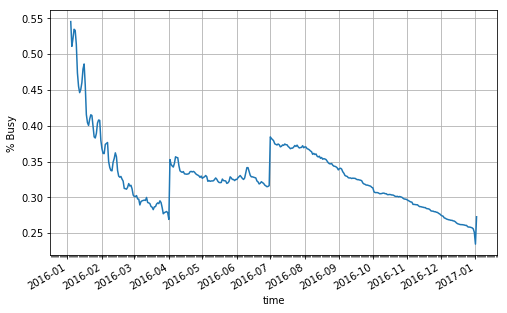

In [30]:
#plotting the availability over days
dates = pd.to_datetime(grouped_data.index.values, errors='ignore')
#dates = dates.astype(datetime)
#dates = matplotlib.dates.date2num(dates)

fig, axs = plt.subplots(1,1)
axs.plot_date(dates,grouped_data['available']['mean'].tolist(), '-')
          

axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(monthsFmt)
axs.xaxis.set_minor_locator(days)
axs.autoscale_view()
axs.fmt_xdata = DateFormatter('%Y-%m-%d')
axs.grid(True)
axs.set_xlabel('time')
axs.set_ylabel('% Busy')

fig.adjustable = True
fig.set_size_inches(8, 5) 
fig.autofmt_xdate()
plt.show()